In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## What This Is
### A cursory examination of the United States based on data from the Worldbank of:
1. CO2 Emissions by sector 
2. Renewable energy production

#### _Data Source: https://www.kaggle.com/worldbank/world-development-indicators_


## Establish data boundaries

In [12]:
file = '../Jupyter Notebook/Week5-Visualization/Indicators.csv'
data = pd.read_csv(file)
data.shape

(5656458, 6)

In [13]:
data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [14]:
years = data['Year'].unique().tolist()
print(min(years)," to ",max(years))

1960  to  2015


### Over 1000 unique indicators

In [15]:
indicators = data['IndicatorName'].unique().tolist()
len(indicators)

1344

## Output a .txt file to review a list of indicators available

In [16]:
with open('indicators.txt', 'w') as file:
    for row in indicators:
        file.write(str(row)+'\n')

# Create masks

In [17]:
# CO2 emission sources
electricity = data['IndicatorName'].str.contains('CO2 emissions from electricity and heat')
manufacturing = data['IndicatorName'].str.contains('CO2 emissions from manufacturing industries')
other = data['IndicatorName'].str.contains('CO2 emissions from other sectors')
residential = data['IndicatorName'].str.contains('CO2 emissions from residential')
solid_fuel = data['IndicatorName'].str.contains('CO2 emissions from solid fuel')
transport = data['IndicatorName'].str.contains('CO2 emissions from transport')

In [18]:
# Mask of USA data
usa_data = data['CountryCode'].str.contains('USA')
usa_data.any()

True

## Selecting the data from masks

In [19]:
stage_electricity = data[usa_data & electricity]
stage_manufacturing = data[usa_data & manufacturing]
stage_other = data[usa_data & other]
stage_residential = data[usa_data & residential]
stage_solid_fuel =data[usa_data & solid_fuel]
stage_transport = data[usa_data & transport]

## Creating our line graph

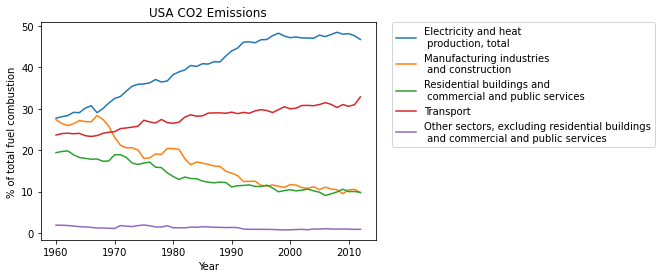

In [20]:
fig, ax = plt.subplots()

electricity, = ax.plot(stage_electricity['Year'].values, stage_electricity['Value'].values, label = 'Electricity and heat\n production, total')
manafacturing, = ax.plot(stage_manufacturing['Year'].values, stage_manufacturing['Value'].values, label = 'Manufacturing industries\n and construction')
residential, = ax.plot(stage_residential['Year'].values, stage_residential['Value'].values,  label = 'Residential buildings and\n commercial and public services')
transport, = ax.plot(stage_transport['Year'].values, stage_transport['Value'].values,  label = 'Transport')
other, = ax.plot(stage_other['Year'].values, stage_other['Value'].values,  label = 'Other sectors, excluding residential buildings\n and commercial and public services')

plt.xlabel('Year')
plt.ylabel('% of total fuel combustion')
plt.title('USA CO2 Emissions')
ax.legend(bbox_to_anchor=(1.05,1), loc='upper left', borderaxespad=0)


## Looking at renewable energy production in the US

In [21]:
# Create a mask of countries who have data on Renewable energy production
renewable_energy_mask = data['IndicatorName'].str.contains('Electricity production from renewable sources, excluding hydroelectric')

In [22]:
# Build dataset
renewable_data = data[renewable_energy_mask]

In [23]:
# Get unique list of countries in dataset
renewable_countries = renewable_data['CountryName'].unique().tolist()

In [24]:
usa_data = data['CountryCode'].str.contains('USA')
stage = data[usa_data & renewable_energy_mask]

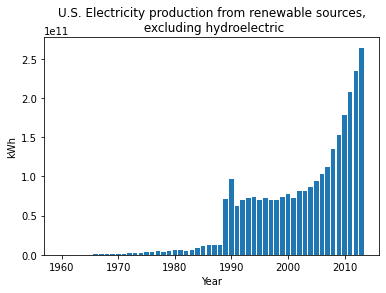

In [25]:
years = stage['Year'].values
kWh = stage['Value'].values
plt.xlabel('Year')
plt.ylabel('kWh')
plt.title('U.S. Electricity production from renewable sources,\n excluding hydroelectric')
plt.bar(years, kWh)
plt.show()

This information shows us the CO2 emissions per sector as a percentage of total fuel combustion for the USA from 1960 to 2016.

The Transportation sector has seen a steady incline over the 40 year period of around 10%. 

We see a reduction in percentage as a function of total fuel combustion starting in the late 1960s from Manufacturing sources, 
as well as a gradual decline from Residential sources until they appear to both level out around 9%
in the 2000s. 

This appears to coincide with the modern day environmental movement. Starting in the late 1960s, legislation aimed at improving 
environmental standards on a national level was first implemented and the creation of what would become the EPA were introduced.

The Electricity and Heating industry, however, saw steady increases until the mid to late 1990s, where it plateaus. Possibly as
a result of steady economic growth along with energy sector carvouts in legislation making allowances for that industry to continue
with development using a business as usual scheme. It's plateau coincides with significant increases made in the renewable energy
production sector which started at the turn of the century.

## Create a bar graph for Solid fuel emissions

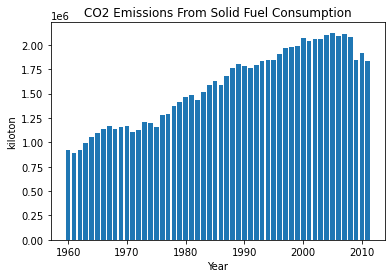

In [26]:
years = stage_solid_fuel['Year'].values
kilotons = stage_solid_fuel['Value'].values

plt.xlabel('Year')
plt.ylabel('kiloton')
plt.title('CO2 Emissions From Solid Fuel Consumption')
plt.bar(years,kilotons)
plt.show()